## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder


## Load the Dataset

In [3]:
# 'newdata' is the dataset
newdata = pd.read_csv('C:\\Users\\User\\ckd-data\\kidney_disease.csv')
newdata

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [10]:
# Define the new column names in the same order as they appear in the DataFrame
newdata.columns = [
    'ID', 'Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar', 
    'Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria', 
    'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium', 
    'Potassium', 'Hemoglobin', 'Packed Cell Volume', 'White Blood Cell Count', 
    'Red Blood Cell Count', 'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease', 
    'Appetite', 'Pedal Edema', 'Anemia', 'Classification'
]

# Display the updated DataFrame
print("Updated DataFrame with new column names:")
newdata.head()

Updated DataFrame with new column names:


,ID,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## Initial Data Inspection
#### View Dataset Summary

In [11]:
# Display basic dataset overview
newdata.describe()

,ID,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [12]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       400 non-null    int64  
 1   Age                      391 non-null    float64
 2   Blood Pressure           388 non-null    float64
 3   Specific Gravity         353 non-null    float64
 4   Albumin                  354 non-null    float64
 5   Sugar                    351 non-null    float64
 6   Red Blood Cells          248 non-null    object 
 7   Pus Cell                 335 non-null    object 
 8   Pus Cell Clumps          396 non-null    object 
 9   Bacteria                 396 non-null    object 
 10  Blood Glucose Random     356 non-null    float64
 11  Blood Urea               381 non-null    float64
 12  Serum Creatinine         383 non-null    float64
 13  Sodium                   313 non-null    float64
 14  Potassium                3

In [18]:
# Replace non-standard values in multiple columns
newdata['Classification'] = newdata['Classification'].str.replace('ckd\t', 'ckd', regex=False)

# Verify the unique values in the 'Classification' column after replacement
print("Unique values in 'Classification' after replacement:")
print(newdata['Classification'].unique())

# Replace non-standard values in 'Diabetes Mellitus' and 'Coronary Artery Disease' columns
newdata['Diabetes Mellitus'].replace(to_replace={'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'}, inplace=True)
newdata['Coronary Artery Disease'].replace(to_replace={'\tno': 'no'}, inplace=True)

# Verify the unique values in each column
print("Unique values in 'Diabetes Mellitus' after replacement:")
print(newdata['Diabetes Mellitus'].unique())

print("Unique values in 'Coronary Artery Disease' after replacement:")
print(newdata['Coronary Artery Disease'].unique())

Unique values in 'Classification' after replacement:
['ckd' 'notckd']
Unique values in 'Diabetes Mellitus' after replacement:
['yes' 'no']
Unique values in 'Coronary Artery Disease' after replacement:
['no' 'yes']


## Handle Missing Data
### Numerical Columns: Fill missing values with the median.
### Categorical Columns: Fill missing values with the mode (most frequent value).

In [19]:
# List of numerical columns
num_cols = ['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar', 'Blood Glucose Random', 
            'Blood Urea', 'Serum Creatinine', 'Sodium', 'Potassium', 'Hemoglobin']

# Fill missing values in numerical columns with the median
for col in num_cols:
    newdata[col].fillna(newdata[col].median(), inplace=True)

# List of categorical columns
cat_cols = ['Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria', 'Hypertension', 'Diabetes Mellitus', 
            'Coronary Artery Disease', 'Appetite', 'Pedal Edema', 'Anemia']

# Fill missing values in categorical columns with the mode
for col in cat_cols:
    newdata[col].fillna(newdata[col].mode()[0], inplace=True)


## Check for Missing Values After Imputation

In [20]:
# Verify that no missing values remain
print("\nMissing values after handling:")
print(newdata.isnull().sum())


Missing values after handling:
ID                           0
Age                          0
Blood Pressure               0
Specific Gravity             0
Albumin                      0
Sugar                        0
Red Blood Cells              0
Pus Cell                     0
Pus Cell Clumps              0
Bacteria                     0
Blood Glucose Random         0
Blood Urea                   0
Serum Creatinine             0
Sodium                       0
Potassium                    0
Hemoglobin                   0
Packed Cell Volume          70
White Blood Cell Count     105
Red Blood Cell Count       130
Hypertension                 0
Diabetes Mellitus            0
Coronary Artery Disease      0
Appetite                     0
Pedal Edema                  0
Anemia                       0
Classification               0
dtype: int64


In [22]:
newdata['Packed Cell Volume'].unique()


array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [23]:
# Replace non-numeric values with NaN
newdata['Packed Cell Volume'] = pd.to_numeric(newdata['Packed Cell Volume'], errors='coerce')

# Now you can fill missing values with the median
newdata['Packed Cell Volume'].fillna(newdata['Packed Cell Volume'].median(), inplace=True)


In [24]:
newdata['Packed Cell Volume'].isnull().sum()


0

In [26]:
# Verify that no missing values remain
print("\nMissing values after handling:")
print(newdata.isnull().sum())


Missing values after handling:
ID                           0
Age                          0
Blood Pressure               0
Specific Gravity             0
Albumin                      0
Sugar                        0
Red Blood Cells              0
Pus Cell                     0
Pus Cell Clumps              0
Bacteria                     0
Blood Glucose Random         0
Blood Urea                   0
Serum Creatinine             0
Sodium                       0
Potassium                    0
Hemoglobin                   0
Packed Cell Volume           0
White Blood Cell Count     105
Red Blood Cell Count       130
Hypertension                 0
Diabetes Mellitus            0
Coronary Artery Disease      0
Appetite                     0
Pedal Edema                  0
Anemia                       0
Classification               0
dtype: int64


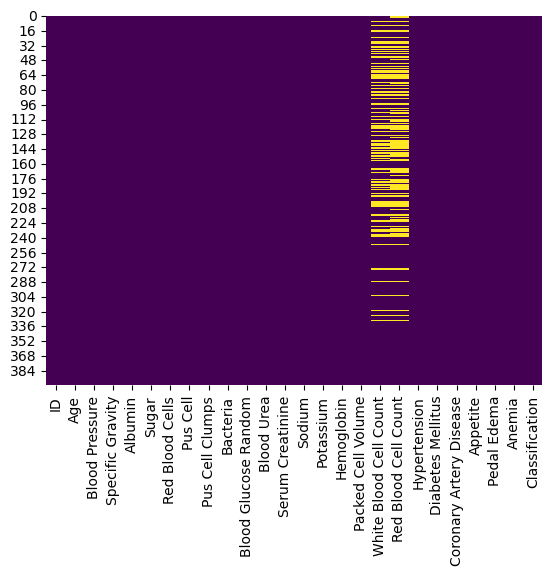

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(newdata.isnull(), cbar=False, cmap='viridis')
plt.show()


In [29]:
print(newdata.isnull().sum())  # Check if any missing values remain


ID                           0
Age                          0
Blood Pressure               0
Specific Gravity             0
Albumin                      0
Sugar                        0
Red Blood Cells              0
Pus Cell                     0
Pus Cell Clumps              0
Bacteria                     0
Blood Glucose Random         0
Blood Urea                   0
Serum Creatinine             0
Sodium                       0
Potassium                    0
Hemoglobin                   0
Packed Cell Volume           0
White Blood Cell Count     105
Red Blood Cell Count       130
Hypertension                 0
Diabetes Mellitus            0
Coronary Artery Disease      0
Appetite                     0
Pedal Edema                  0
Anemia                       0
Classification               0
dtype: int64


In [30]:
newdata['White Blood Cell Count'].unique()
newdata['Red Blood Cell Count'].unique()


array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '\t?', '5.4',
       '6.1', '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7',
       '5.9', '6.5'], dtype=object)

In [31]:
# Convert to numeric, coercing errors into NaN
newdata['White Blood Cell Count'] = pd.to_numeric(newdata['White Blood Cell Count'], errors='coerce')
newdata['Red Blood Cell Count'] = pd.to_numeric(newdata['Red Blood Cell Count'], errors='coerce')

# Fill missing values with the median
newdata['White Blood Cell Count'].fillna(newdata['White Blood Cell Count'].median(), inplace=True)
newdata['Red Blood Cell Count'].fillna(newdata['Red Blood Cell Count'].median(), inplace=True)


In [32]:
newdata['White Blood Cell Count'].isnull().sum()
newdata['Red Blood Cell Count'].isnull().sum()


0

In [34]:
# Verify that no missing values remain
print("\nMissing values after handling:")
print(newdata.isnull().sum())



Missing values after handling:
ID                         0
Age                        0
Blood Pressure             0
Specific Gravity           0
Albumin                    0
Sugar                      0
Red Blood Cells            0
Pus Cell                   0
Pus Cell Clumps            0
Bacteria                   0
Blood Glucose Random       0
Blood Urea                 0
Serum Creatinine           0
Sodium                     0
Potassium                  0
Hemoglobin                 0
Packed Cell Volume         0
White Blood Cell Count     0
Red Blood Cell Count       0
Hypertension               0
Diabetes Mellitus          0
Coronary Artery Disease    0
Appetite                   0
Pedal Edema                0
Anemia                     0
Classification             0
dtype: int64


In [35]:
# Convert object types to numeric where needed
newdata['Packed Cell Volume'] = pd.to_numeric(newdata['Packed Cell Volume'], errors='coerce')
newdata['White Blood Cell Count'] = pd.to_numeric(newdata['White Blood Cell Count'], errors='coerce')
newdata['Red Blood Cell Count'] = pd.to_numeric(newdata['Red Blood Cell Count'], errors='coerce')


## Outlier Detection and Removal
### Using the IQR method to detect outliers for 'White Blood Cell Count' and other numerical columns.

In [36]:
# Calculate IQR for 'White Blood Cell Count'
Q1 = newdata['White Blood Cell Count'].quantile(0.25)
Q3 = newdata['White Blood Cell Count'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using IQR
outliers_iqr = newdata[(newdata['White Blood Cell Count'] < lower_bound) | 
                       (newdata['White Blood Cell Count'] > upper_bound)]

print("Outliers using IQR method:")
print(outliers_iqr)


Outliers using IQR method:
      ID   Age  Blood Pressure  Specific Gravity  Albumin  Sugar  \
48    48  73.0            70.0             1.005      0.0    0.0   
49    49  60.0            70.0             1.010      2.0    0.0   
71    71  46.0            60.0             1.010      1.0    0.0   
88    88  58.0           110.0             1.010      4.0    0.0   
107  107  55.0           100.0             1.015      1.0    4.0   
123  123  43.0            80.0             1.015      2.0    3.0   
127  127  71.0            60.0             1.015      4.0    0.0   
130  130  50.0            90.0             1.010      2.0    0.0   
132  132  50.0            80.0             1.020      0.0    0.0   
147  147  60.0            60.0             1.010      3.0    1.0   
153  153  55.0            90.0             1.010      2.0    1.0   
167  167  34.0            70.0             1.020      0.0    0.0   
181  181  45.0            70.0             1.025      2.0    0.0   
190  190   6.0       

## Exploratory Data Analysis (EDA)
### Boxplot for Identifying Outliers

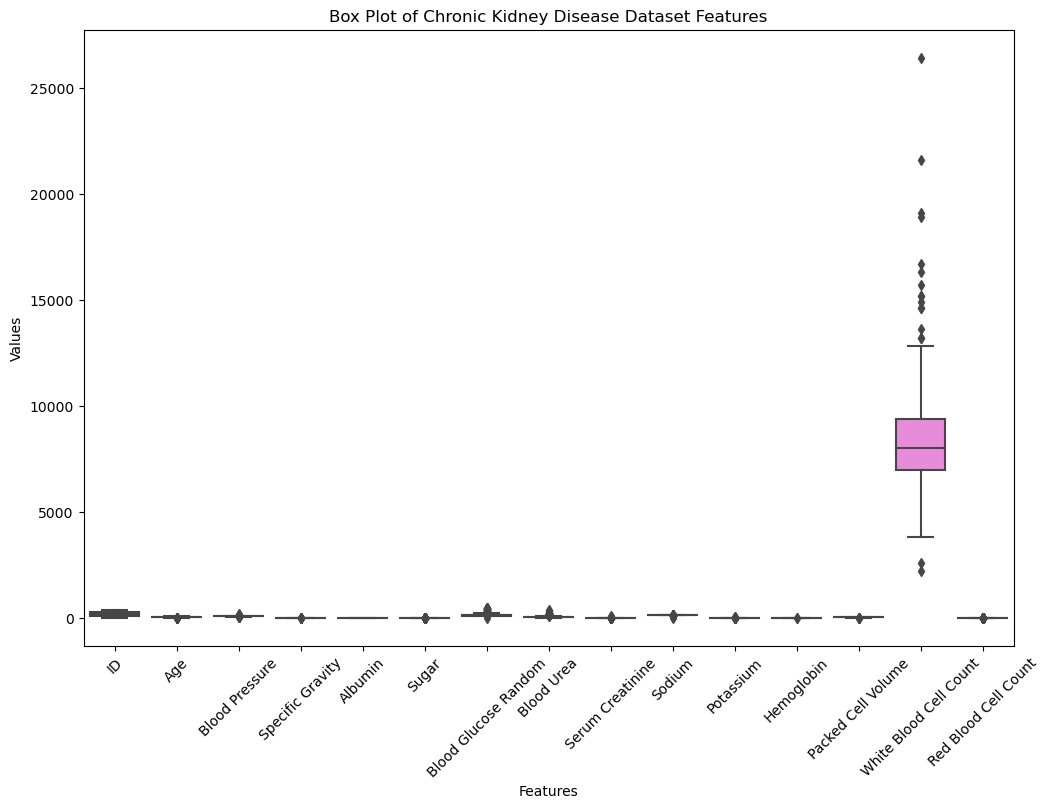

In [37]:
# Boxplot for visualizing outliers in numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=newdata)
plt.title('Box Plot of Chronic Kidney Disease Dataset Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


## Histogram for Distribution of Numerical Features

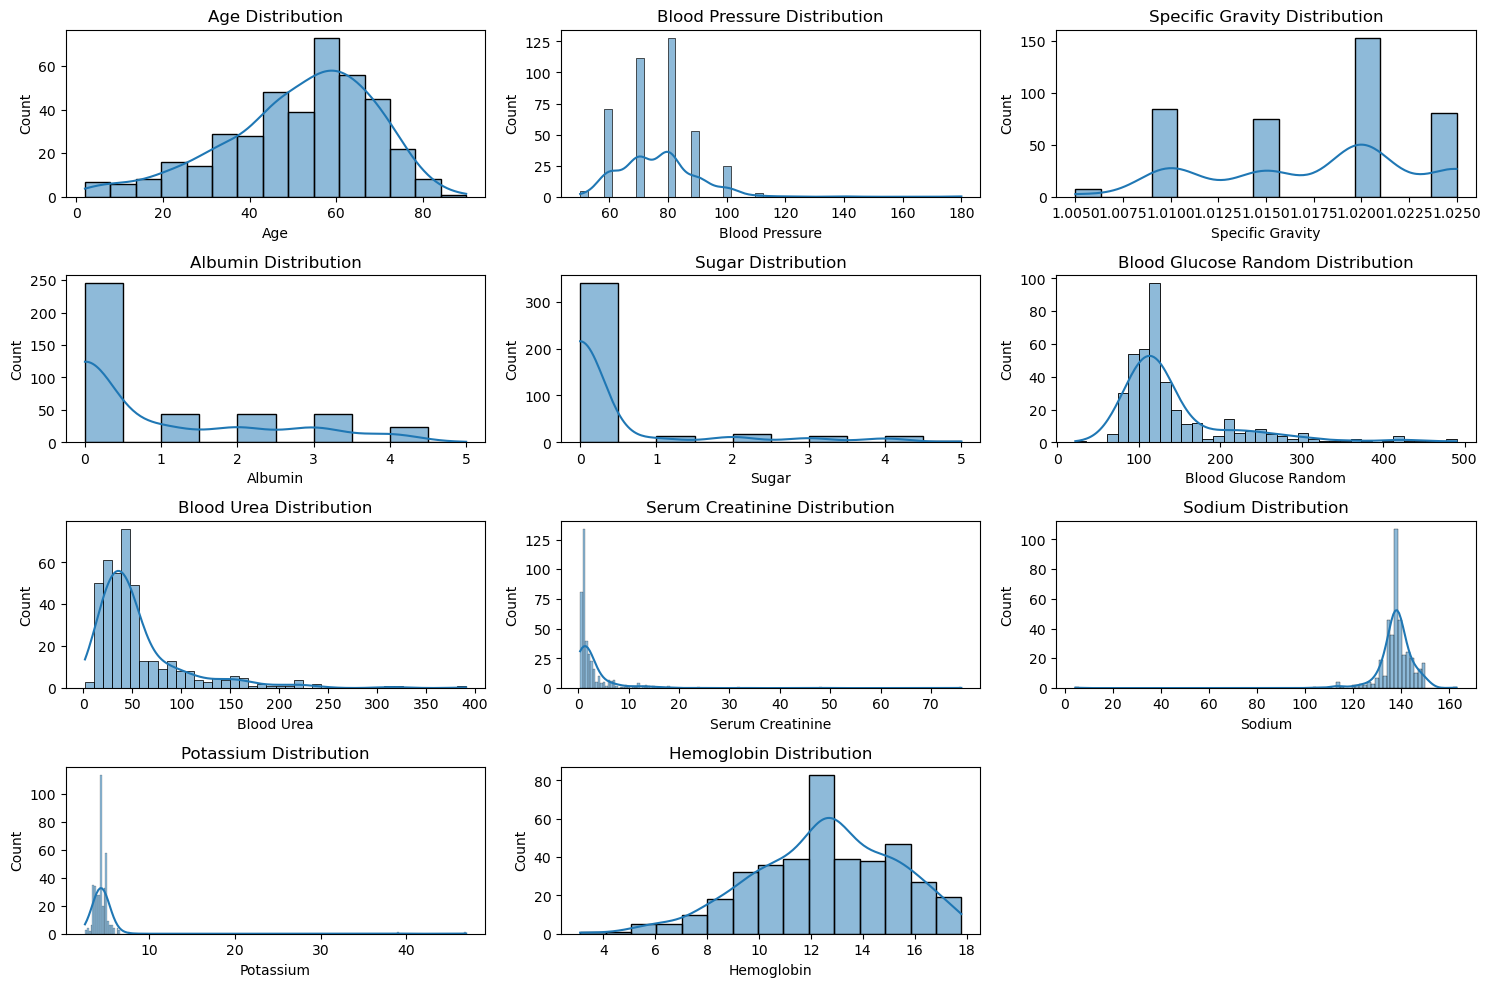

In [38]:
# Visualizing the distribution of numerical columns
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 3, i)  # Adjust layout for a grid of 5x3
    sns.histplot(newdata[col], kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()


## Feature Scaling
### Standardization using StandardScaler

In [39]:
# Apply StandardScaler to numerical columns
scaler = StandardScaler()
newdata[num_cols] = scaler.fit_transform(newdata[num_cols])

# Check result after scaling
print(newdata[num_cols].head())


        Age  Blood Pressure  Specific Gravity   Albumin     Sugar  \
0 -0.210031        0.254214          0.421486  0.076249 -0.380269   
1 -2.627234       -1.972476          0.421486  2.363728 -0.380269   
2  0.615355        0.254214         -1.421074  0.838742  2.507853   
3 -0.210031       -0.488016         -2.342354  2.363728 -0.380269   
4 -0.033163        0.254214         -1.421074  0.838742 -0.380269   

   Blood Glucose Random  Blood Urea  Serum Creatinine    Sodium  Potassium  \
0             -0.320122   -0.419451         -0.319668  0.040104  -0.062903   
1             -0.320122   -0.784315         -0.390819  0.040104  -0.062903   
2              3.697618   -0.074858         -0.212942  0.040104  -0.062903   
3             -0.373337   -0.014047          0.142813 -2.896333  -0.737181   
4             -0.519679   -0.622154         -0.284093  0.040104  -0.062903   

   Hemoglobin  
0    1.053226  
1   -0.457965  
2   -1.084556  
3   -0.494823  
4   -0.347390  


## Normalization using MinMaxScaler

In [41]:
#Apply MinMaxScaler to numerical columns
scaler = MinMaxScaler()
newdata[num_cols] = scaler.fit_transform(newdata[num_cols])

#Check result after normalization
print(newdata[num_cols].head())


        Age  Blood Pressure  Specific Gravity  Albumin  Sugar  \
0  0.522727        0.230769              0.75      0.2    0.0   
1  0.056818        0.000000              0.75      0.8    0.0   
2  0.681818        0.230769              0.25      0.4    0.6   
3  0.522727        0.153846              0.00      0.8    0.0   
4  0.556818        0.230769              0.25      0.4    0.0   

   Blood Glucose Random  Blood Urea  Serum Creatinine    Sodium  Potassium  \
0              0.211538    0.088575          0.010582  0.842271   0.042697   
1              0.211538    0.042362          0.005291  0.842271   0.042697   
2              0.856838    0.132221          0.018519  0.842271   0.042697   
3              0.202991    0.139923          0.044974  0.671924   0.000000   
4              0.179487    0.062901          0.013228  0.842271   0.042697   

   Hemoglobin  
0    0.836735  
1    0.557823  
2    0.442177  
3    0.551020  
4    0.578231  


## Distribution of Scaled Features

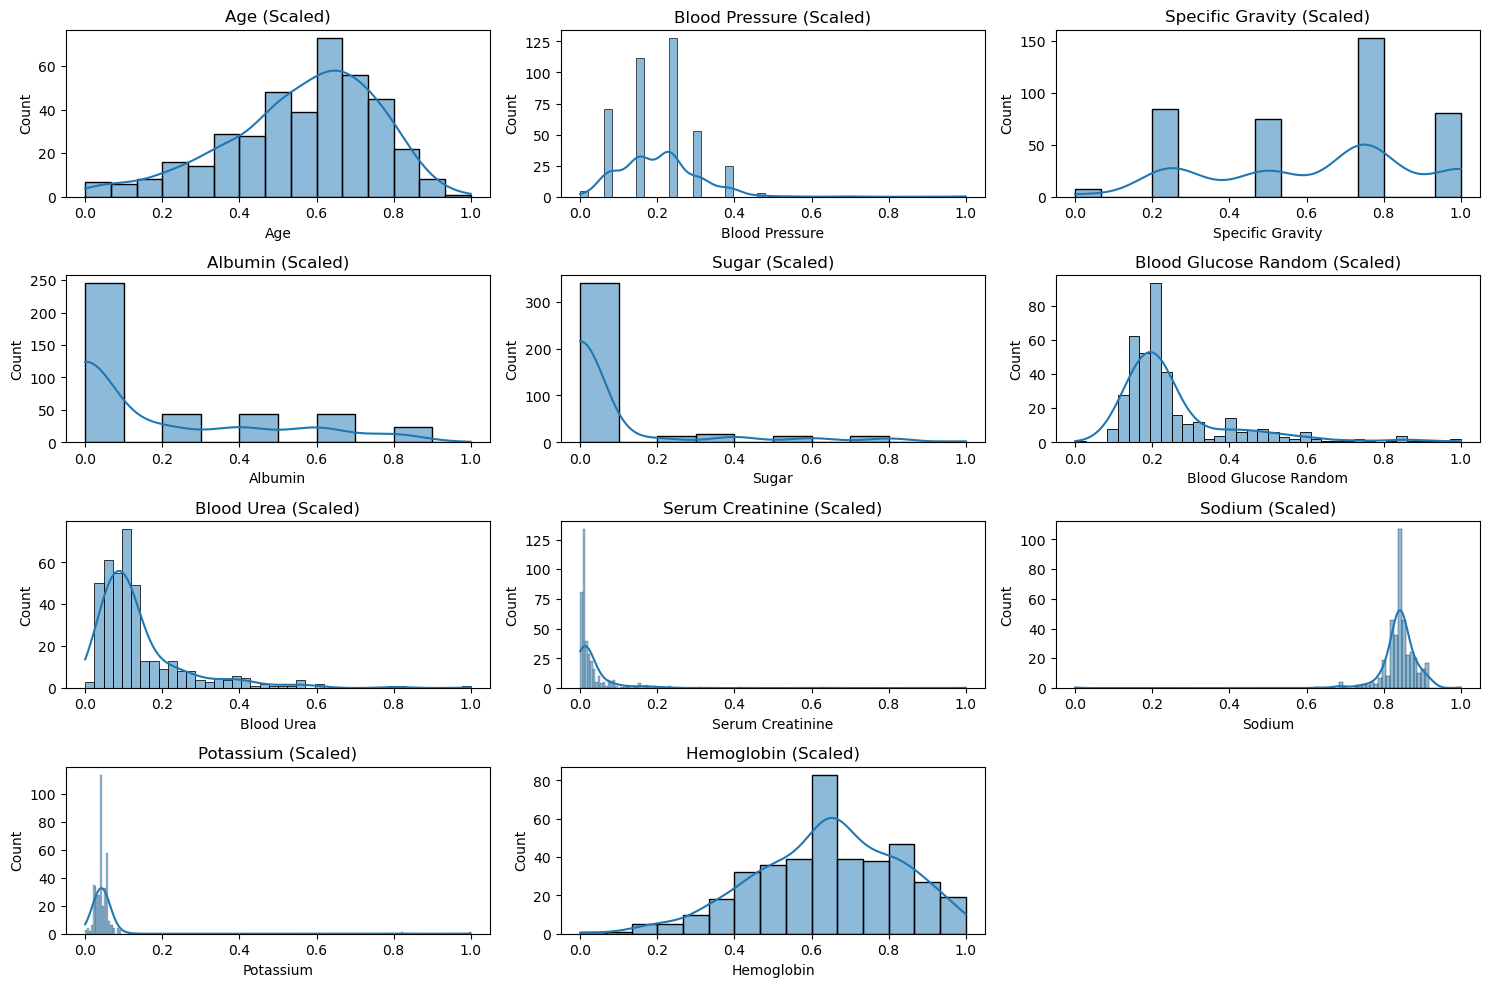

In [42]:
# Plot histograms after scaling
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 3, i)
    sns.histplot(newdata[col], kde=True)
    plt.title(f'{col} (Scaled)')

plt.tight_layout()
plt.show()


## Feature Encoding
## Binary Encoding using LabelEncoder for Binary Features

In [43]:
# List of binary columns
binary_cols = ['Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite', 
               'Pedal Edema', 'Anemia', 'Classification']

# Apply LabelEncoder to binary columns
le = LabelEncoder()
for col in binary_cols:
    newdata[col] = le.fit_transform(newdata[col])

# Check encoded values
print(newdata[binary_cols].head())


   Hypertension  Diabetes Mellitus  Coronary Artery Disease  Appetite  \
0             1                  1                        0         0   
1             0                  0                        0         0   
2             0                  1                        0         1   
3             1                  0                        0         1   
4             0                  0                        0         0   

   Pedal Edema  Anemia  Classification  
0            0       0               0  
1            0       0               0  
2            0       1               0  
3            1       1               0  
4            0       0               0  


## One-Hot Encoding for Multicategory Columns

In [44]:
# One-hot encode categorical variables with more than two categories
newdata = pd.get_dummies(newdata, columns=['Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria'])

# Check result after one-hot encoding
print(newdata.head())


   ID       Age  Blood Pressure  Specific Gravity  Albumin  Sugar  \
0   0  0.522727        0.230769              0.75      0.2    0.0   
1   1  0.056818        0.000000              0.75      0.8    0.0   
2   2  0.681818        0.230769              0.25      0.4    0.6   
3   3  0.522727        0.153846              0.00      0.8    0.0   
4   4  0.556818        0.230769              0.25      0.4    0.0   

   Blood Glucose Random  Blood Urea  Serum Creatinine    Sodium  ...  Anemia  \
0              0.211538    0.088575          0.010582  0.842271  ...       0   
1              0.211538    0.042362          0.005291  0.842271  ...       0   
2              0.856838    0.132221          0.018519  0.842271  ...       1   
3              0.202991    0.139923          0.044974  0.671924  ...       1   
4              0.179487    0.062901          0.013228  0.842271  ...       0   

   Classification  Red Blood Cells_abnormal  Red Blood Cells_normal  \
0               0                

## Train-Test Split

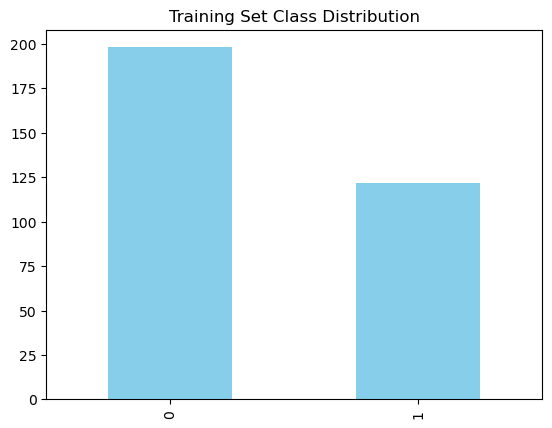

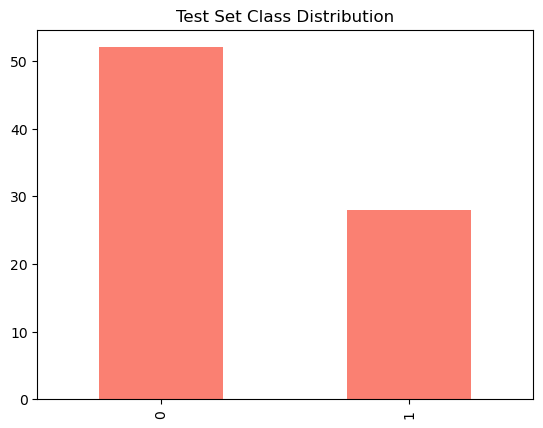

In [45]:
# Define features (X) and target variable (y)
X = newdata.drop(columns=['Classification'])
y = newdata['Classification']

# Perform train-test split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize class distribution in the train and test sets
y_train.value_counts().plot(kind='bar', title='Training Set Class Distribution', color='skyblue')
plt.show()

y_test.value_counts().plot(kind='bar', title='Test Set Class Distribution', color='salmon')
plt.show()


## Summary of Preprocessed Data


In [46]:
# Display first few rows of preprocessed data
print(newdata.head())

# Summary statistics after preprocessing
print(newdata.describe())


   ID       Age  Blood Pressure  Specific Gravity  Albumin  Sugar  \
0   0  0.522727        0.230769              0.75      0.2    0.0   
1   1  0.056818        0.000000              0.75      0.8    0.0   
2   2  0.681818        0.230769              0.25      0.4    0.6   
3   3  0.522727        0.153846              0.00      0.8    0.0   
4   4  0.556818        0.230769              0.25      0.4    0.0   

   Blood Glucose Random  Blood Urea  Serum Creatinine    Sodium  ...  Anemia  \
0              0.211538    0.088575          0.010582  0.842271  ...       0   
1              0.211538    0.042362          0.005291  0.842271  ...       0   
2              0.856838    0.132221          0.018519  0.842271  ...       1   
3              0.202991    0.139923          0.044974  0.671924  ...       1   
4              0.179487    0.062901          0.013228  0.842271  ...       0   

   Classification  Red Blood Cells_abnormal  Red Blood Cells_normal  \
0               0                

## Save Preprocessed Data to CSV

In [56]:
# Save preprocessed data to CSV
newdata.to_csv('preprocessed_data.csv', index=False)


In [ ]:
#---File path of pre processed data ---"C:\Users\User\ckd-data\preprocessed_data.csv"

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import joblib


## Check if the Preprocessed Data Was Saved

In [58]:
import pandas as pd

# Load your raw data 
preprocessed_data = pd.read_csv("C:\\Users\\User\\ckd-data\\preprocessed_data.csv")  

preprocessed_data

,ID,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,...,Anemia,Classification,Red Blood Cells_abnormal,Red Blood Cells_normal,Pus Cell_abnormal,Pus Cell_normal,Pus Cell Clumps_notpresent,Pus Cell Clumps_present,Bacteria_notpresent,Bacteria_present
0,0,0.522727,0.230769,0.75,0.2,0.0,0.211538,0.088575,0.010582,0.842271,...,0,0,0,1,0,1,1,0,1,0
1,1,0.056818,0.000000,0.75,0.8,0.0,0.211538,0.042362,0.005291,0.842271,...,0,0,0,1,0,1,1,0,1,0
2,2,0.681818,0.230769,0.25,0.4,0.6,0.856838,0.132221,0.018519,0.842271,...,1,0,0,1,0,1,1,0,1,0
3,3,0.522727,0.153846,0.00,0.8,0.0,0.202991,0.139923,0.044974,0.671924,...,1,0,0,1,1,0,0,1,1,0
4,4,0.556818,0.230769,0.25,0.4,0.0,0.179487,0.062901,0.013228,0.842271,...,0,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,0.602273,0.230769,0.75,0.0,0.0,0.252137,0.121951,0.001323,0.917981,...,0,1,0,1,0,1,1,0,1,0
396,396,0.454545,0.153846,1.00,0.0,0.0,0.113248,0.075738,0.010582,0.861199,...,0,1,0,1,0,1,1,0,1,0
397,397,0.113636,0.230769,0.75,0.0,0.0,0.166667,0.062901,0.002646,0.835962,...,0,1,0,1,0,1,1,0,1,0
398,398,0.170455,0.076923,1.00,0.0,0.0,0.196581,0.124519,0.007937,0.823344,...,0,1,0,1,0,1,1,0,1,0


## Split the Data into Features and Target

In [59]:
# Separate features and target variable
X = preprocessed_data.drop(columns=['Classification', 'ID'])  # drop target and ID columns
y = preprocessed_data['Classification']


In [72]:
X

,ID,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,...,Pedal Edema,Anemia,Red Blood Cells_abnormal,Red Blood Cells_normal,Pus Cell_abnormal,Pus Cell_normal,Pus Cell Clumps_notpresent,Pus Cell Clumps_present,Bacteria_notpresent,Bacteria_present
0,0,0.522727,0.230769,0.75,0.2,0.0,0.211538,0.088575,0.010582,0.842271,...,0,0,0,1,0,1,1,0,1,0
1,1,0.056818,0.000000,0.75,0.8,0.0,0.211538,0.042362,0.005291,0.842271,...,0,0,0,1,0,1,1,0,1,0
2,2,0.681818,0.230769,0.25,0.4,0.6,0.856838,0.132221,0.018519,0.842271,...,0,1,0,1,0,1,1,0,1,0
3,3,0.522727,0.153846,0.00,0.8,0.0,0.202991,0.139923,0.044974,0.671924,...,1,1,0,1,1,0,0,1,1,0
4,4,0.556818,0.230769,0.25,0.4,0.0,0.179487,0.062901,0.013228,0.842271,...,0,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,0.602273,0.230769,0.75,0.0,0.0,0.252137,0.121951,0.001323,0.917981,...,0,0,0,1,0,1,1,0,1,0
396,396,0.454545,0.153846,1.00,0.0,0.0,0.113248,0.075738,0.010582,0.861199,...,0,0,0,1,0,1,1,0,1,0
397,397,0.113636,0.230769,0.75,0.0,0.0,0.166667,0.062901,0.002646,0.835962,...,0,0,0,1,0,1,1,0,1,0
398,398,0.170455,0.076923,1.00,0.0,0.0,0.196581,0.124519,0.007937,0.823344,...,0,0,0,1,0,1,1,0,1,0


In [75]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Classification, Length: 400, dtype: int32

## Train-Test Split

In [60]:
# Spliting  data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [76]:
X_train

,ID,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,...,Pedal Edema,Anemia,Red Blood Cells_abnormal,Red Blood Cells_normal,Pus Cell_abnormal,Pus Cell_normal,Pus Cell Clumps_notpresent,Pus Cell Clumps_present,Bacteria_notpresent,Bacteria_present
3,3,0.522727,0.153846,0.00,0.8,0.0,0.202991,0.139923,0.044974,0.671924,...,1,1,0,1,1,0,0,1,1,0
18,18,0.659091,0.384615,1.00,0.0,0.6,0.514957,0.065469,0.011905,0.823344,...,0,0,0,1,0,1,1,0,1,0
202,202,0.863636,0.076923,0.75,0.0,0.0,0.196581,0.186136,0.033069,0.823344,...,0,1,0,1,0,1,1,0,1,0
250,250,0.431818,0.230769,1.00,0.0,0.0,0.252137,0.021823,0.010582,0.823344,...,0,0,0,1,0,1,1,0,1,0
274,274,0.193182,0.230769,0.75,0.0,0.0,0.181624,0.055199,0.003968,0.861199,...,0,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,71,0.500000,0.076923,0.25,0.2,0.0,0.301282,0.232349,0.038360,0.861199,...,0,0,0,1,0,1,1,0,1,0
106,106,0.545455,0.307692,0.75,0.0,0.0,0.143162,0.299101,0.075397,0.772871,...,1,1,0,1,0,1,1,0,1,0
270,270,0.238636,0.230769,1.00,0.0,0.0,0.190171,0.083440,0.009259,0.886435,...,0,0,0,1,0,1,1,0,1,0
348,348,0.409091,0.230769,0.75,0.0,0.0,0.164530,0.044929,0.001323,0.899054,...,0,0,0,1,0,1,1,0,1,0


## Standardize the Data (for models like SVM and Logistic Regression)


In [61]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Train Models

In [63]:
# Instantiate models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC()
}

# Train models and make predictions
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Store evaluation metrics
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

# Convert results to a DataFrame for easy viewing
results_data = pd.DataFrame(results).T
print(results_data)


                    Accuracy Precision    Recall  F1 Score   ROC AUC  \
Logistic Regression   0.9875  0.967742       1.0  0.983607      0.99   
Decision Tree         0.9625       1.0       0.9  0.947368      0.95   
Random Forest          0.975       1.0  0.933333  0.965517  0.966667   
Gradient Boosting      0.975       1.0  0.933333  0.965517  0.966667   
SVM                   0.9875  0.967742       1.0  0.983607      0.99   

                       Confusion Matrix  
Logistic Regression  [[49, 1], [0, 30]]  
Decision Tree        [[50, 0], [3, 27]]  
Random Forest        [[50, 0], [2, 28]]  
Gradient Boosting    [[50, 0], [2, 28]]  
SVM                  [[49, 1], [0, 30]]  


## Cross-Validation

In [64]:
# Perform cross-validation on the models
cross_val_results = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cross_val_results[model_name] = cv_scores.mean()

# Display cross-validation results
print('Cross-Validation Results:')
for model_name, score in cross_val_results.items():
    print(f'{model_name}: {score:.4f}')


Cross-Validation Results:
Logistic Regression: 1.0000
Decision Tree: 0.9781
Random Forest: 0.9906
Gradient Boosting: 0.9844
SVM: 0.9969


## Hyperparameter Tuning (Example with Random Forest)

In [65]:
# Example of hyperparameter tuning with RandomizedSearchCV for Random Forest
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(RandomForestClassifier(), param_dist, n_iter=10, cv=3, random_state=42)
random_search.fit(X_train_scaled, y_train)

print("Best Parameters:", random_search.best_params_)

# Train model with the best parameters
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

# Evaluate the model
print("Random Forest (Tuned) Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")


Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Random Forest (Tuned) Performance:
Accuracy: 0.9750
F1 Score: 0.9655


## Class Imbalance Handling (SMOTE)

In [66]:
# Use SMOTE to handle class imbalance (if necessary)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

# Train a model on the resampled data
rf_model = RandomForestClassifier()
rf_model.fit(X_res, y_res)

# Predict and evaluate
y_pred = rf_model.predict(X_test_scaled)
print(f"Random Forest with SMOTE Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Random Forest with SMOTE Accuracy: 0.9750


## Model Interpretation (Feature Importance for Random Forest)

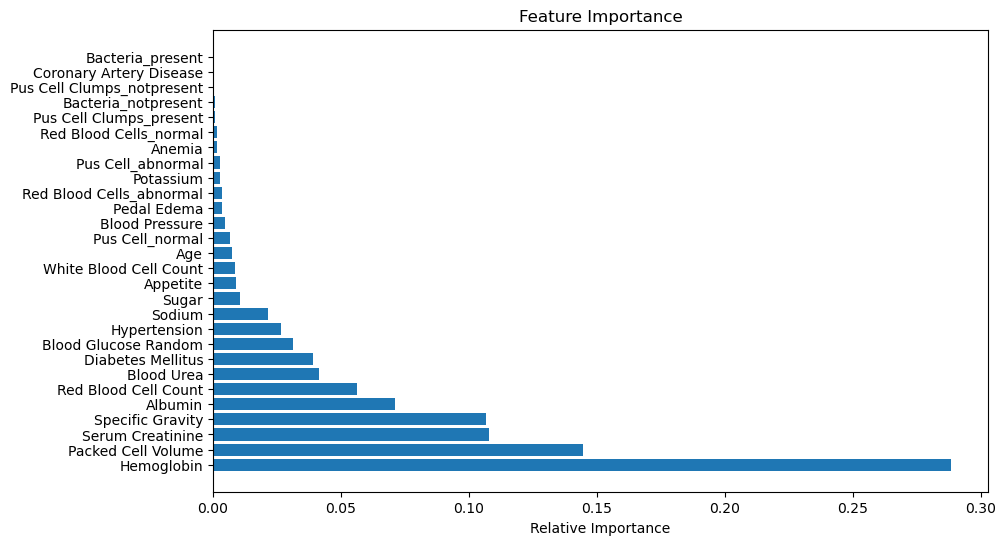

In [67]:
# Feature importance for Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlabel('Relative Importance')
plt.show()


## Save the Model 

In [68]:
# Save the trained Random Forest model using Joblib
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')  


['scaler.pkl']

## Model Evaluation Summary (Confusion Matrix & Metrics)

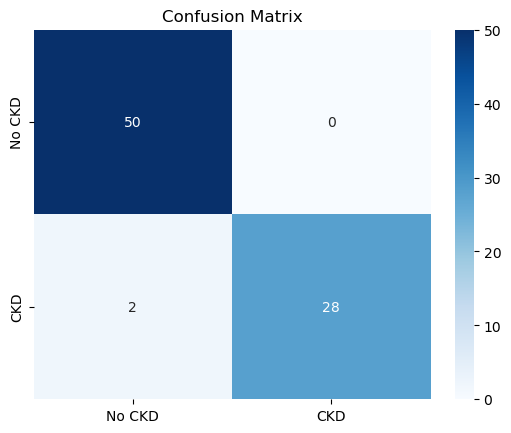

Precision: 1.0
Recall: 0.9333333333333333
F1 Score: 0.9655172413793104
ROC AUC: 0.9666666666666667


In [69]:
# Print confusion matrix and other metrics for the final model
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No CKD', 'CKD'], yticklabels=['No CKD', 'CKD'])
plt.title('Confusion Matrix')
plt.show()

print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")


In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = newdata.drop(columns=['Classification'])  
y = newdata['Classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Make predictions using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

